In [29]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
data = sklearn.datasets.load_digits()
X = data.data
y = data.target

In [21]:
clf = sklearn.tree.DecisionTreeClassifier(max_features=int(np.sqrt(X.shape[1])))

In [13]:
print(cross_val_score(clf,X,y,cv=10,n_jobs=-1).mean())

0.8253309677052065


In [15]:
clf = BaggingClassifier(n_estimators=100,n_jobs=-1)
print(cross_val_score(clf,X,y,cv=10,n_jobs=-1).mean())

0.9243413505707185


In [22]:
clf = BaggingClassifier(clf,n_estimators=100,n_jobs=-1)
print(cross_val_score(clf,X,y,cv=10,n_jobs=-1).mean())

0.9561683874931861


In [24]:
clf_r = RandomForestClassifier(n_estimators=100,n_jobs=-1)
print(cross_val_score(clf_r,X,y,cv=10,n_jobs=-1).mean())

0.950545112948603


In [35]:
num_trees = np.arange(100,1000,50)
num_trees

array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700,
       750, 800, 850, 900, 950])

In [38]:
%%time
sc = []
for i in num_trees:
    clf_r = RandomForestClassifier(n_estimators=i,n_jobs=-1,random_state=0)
    sc.append(cross_val_score(clf_r,X,y,cv=10,n_jobs=-1).mean())

CPU times: user 968 ms, sys: 63 ms, total: 1.03 s
Wall time: 1min 12s


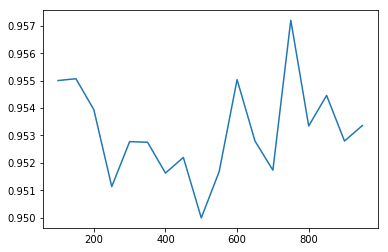

In [39]:
plt.plot(num_trees,sc,'-')
plt.show()

In [41]:
clf_r = RandomForestClassifier(n_estimators=100,n_jobs=-1,max_depth=5)
print(cross_val_score(clf_r,X,y,cv=10,n_jobs=-1).mean())

0.9069585496670305
